# Notebook for Exploring smFISH Data Analysis
1. Parse .npz files
2. Visualize detections

## Parse .npz files

In [ ]:
import numpy as np
import pandas as pd
import os

# build a dataframe from .npz files
indir = 'detections/all_timepoints_threshold_150'
infiles = [x for x in os.listdir(indir) if x.endswith('.npz')]

# prepare buckets for the data
file_name = []
ch = []
strain = []
time = []
treatment = []
total_vRNAs = []
cytosolic_RNAs = []
repSites = []
mol_per_repSite = []

# parse .npz files and add data to lists
# specify different timepoints
times = ['2h', '6h', '8h', '24h']

# loop through directory
for file in infiles:
    
    # specify time points
    for t in times:
        
        # load data
        data = np.load(os.path.join(indir, file))

        # add data to lists
        file_name.append(file)
        total_vRNAs.append(data['rna_coord'].shape[0]+np.sum(data['foci'][:,4]))
        cytosolic_RNAs.append(data['rna_coord'].shape[0])
        repSites.append(data['foci'].shape[0])
        mol_per_repSite.append(np.mean(data['foci'][:,4]))

        # specify treatments and strains
        if 'MOCK' in file:
            strain.append('None')
            time.append(t.split('h')[0])
            treatment.append('MOCK')
        if 'B117_INF' in file:
            strain.append('B117')
            time.append(t.split('h')[0])
            treatment.append('INF')
        if 'B117_RDV' in file:
            strain.append('B117')
            time.append(t.split('h')[0])
            treatment.append('RDV')
        if 'Vic_INF' in file:
            strain.append('Vic')
            time.append(t.split('h')[0])
            treatment.append('INF')  
        if 'Vic_RDV' in file:
            strain.append('Vic')
            time.append(t.split('h')[0])
            treatment.append('RDV')
        if 'ch3' in file:
            ch.append(3)
        if 'ch4' in file:
            ch.append(4)

# create a dataframe from the lists
data_tall = pd.DataFrame(list(zip(file_name, ch, strain, time, treatment, total_vRNAs,
                            cytosolic_RNAs, repSites, mol_per_repSite)),
            columns =['file_name', 'ch', 'strain', 'time', 'treatment', 'total_vRNAs',
                            'cytosolic_RNAs', 'repSites', 'mol_per_repSite'])

# save dataframe
data_tall.to_csv('Data_summary.csv')
print('finished')

# Visualize the Results

## Read .npz files

CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results_cell_5.npz
Available keys: cell_id, bbox, cell_coord, cell_mask, rna_coord, foci, image, smfish 

 number of rna 66
 number of foci 4


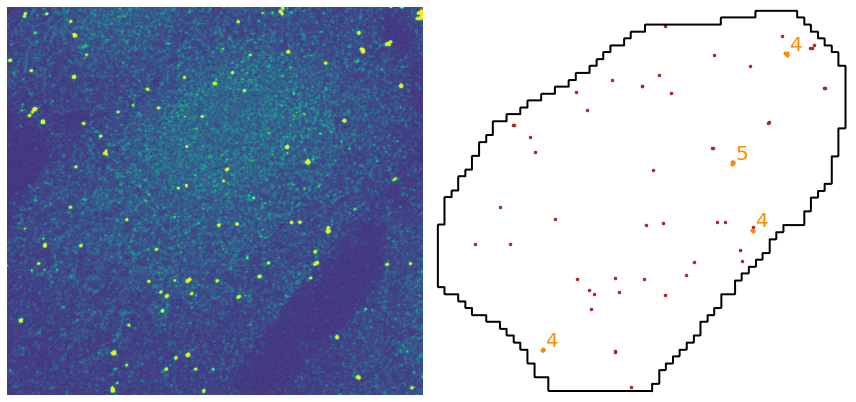

CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results_cell_4.npz
Available keys: cell_id, bbox, cell_coord, cell_mask, rna_coord, foci, image, smfish 

 number of rna 86
 number of foci 1


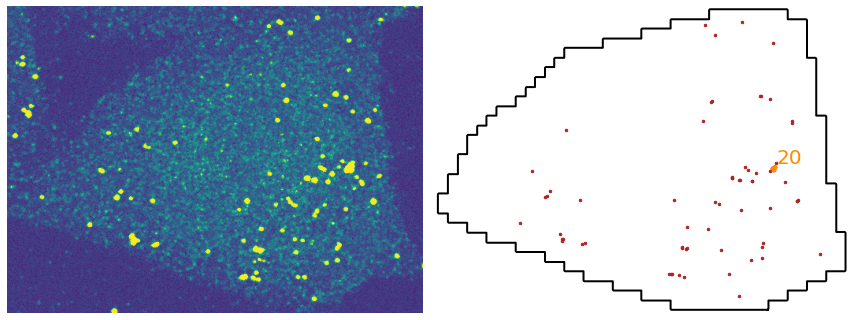

CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results_cell_0.npz
Available keys: cell_id, bbox, cell_coord, cell_mask, rna_coord, foci, image, smfish 

 number of rna 131
 number of foci 1


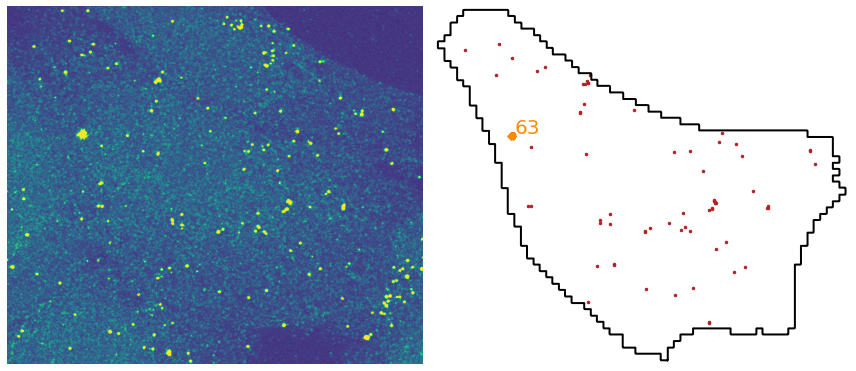

CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results_cell_1.npz
Available keys: cell_id, bbox, cell_coord, cell_mask, rna_coord, foci, image, smfish 

 number of rna 172
 number of foci 6


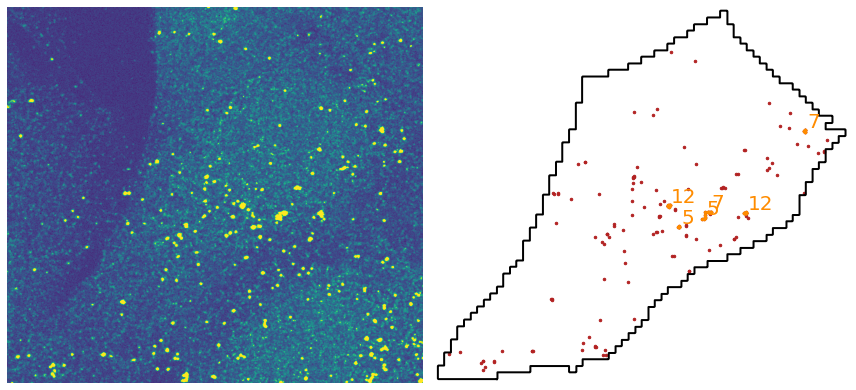

CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results_cell_3.npz
Available keys: cell_id, bbox, cell_coord, cell_mask, rna_coord, foci, image, smfish 

 number of rna 329
 number of foci 16


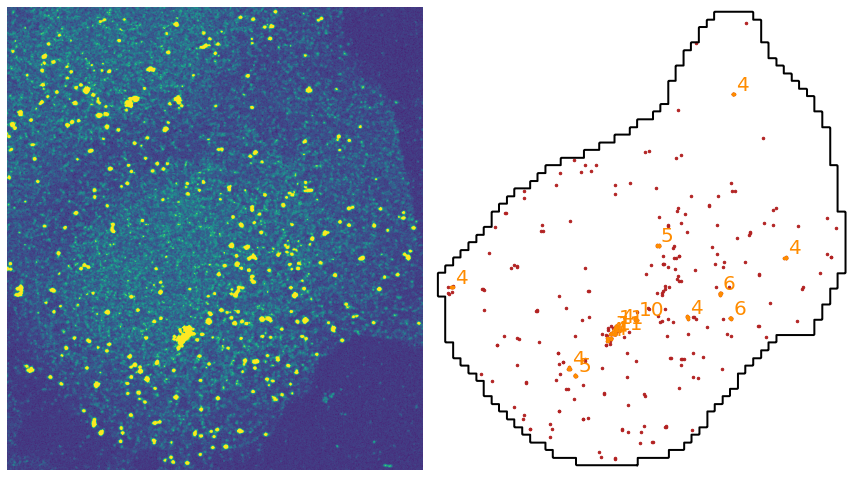

CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results_cell_2.npz
Available keys: cell_id, bbox, cell_coord, cell_mask, rna_coord, foci, image, smfish 

 number of rna 76
 number of foci 2


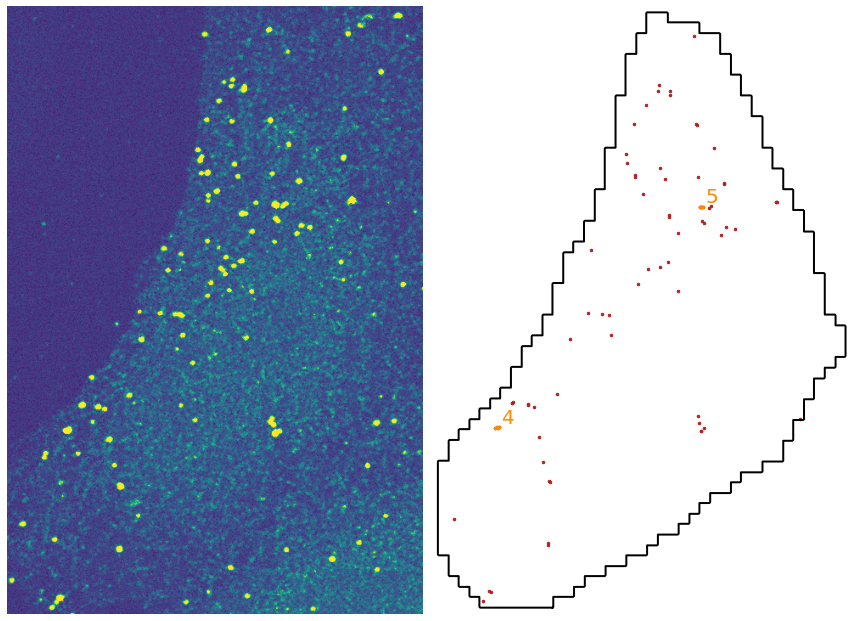

In [14]:
import os
import numpy as np
import bigfish.stack as stack
import bigfish.plot as plot

# load single cell data
indir = 'detections'
keyword = 'CoV-FISH-10_Vero_2h_B117_INF_R1_00001_ch3_results'
infiles = [x for x in os.listdir(indir) if x.endswith('.npz') and keyword in x]

def plot_cells():
    # get cell results
    cell_mask = data["cell_mask"]
    cell_coord = data["cell_coord"]
    rna_coord = data["rna_coord"]
    foci_coord = data["foci"]
    image_contrasted = data["image"]
    print("\r number of rna {0}".format(len(rna_coord)))
    print("\r number of foci {0}".format(len(foci_coord)))

    # plot cell
    plot.plot_cell(
        ndim=3, cell_coord=cell_coord, rna_coord=rna_coord, 
        foci_coord=foci_coord, image=image_contrasted, 
        cell_mask=cell_mask, framesize=(12, 10))
    
for file in infiles:
    path = os.path.join(indir, file)
    print (file)
    data = stack.read_cell_extracted(path, verbose=True)
    rna_coord = data["rna_coord"]
    foci_coord = data["foci"]
    plot_cells()
